## Visualisation Airbnb

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

### Load Data

In [40]:
#fields = ['id','name','host_id','host_name',latitude','longitude','room_type','price','minimum_nights','number_of_reviews',
#          'last_review','reviews_per_month','calculated_host_listings_count','availability_365','city']
#data = pd.read_csv('AB_US_2020.csv',usecols=fields)
data = pd.read_csv("AB_US_2020.csv")

/home_local/isduser/anaconda3/envs/dataviz/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [41]:
data.head()

id                                               name  host_id  \
0   38585    Charming Victorian home - twin beds + breakfast   165529   
1   80905                                   French Chic Loft   427027   
2  108061  Walk to stores/parks/downtown. Fenced yard/Pet...   320564   
3  155305                 Cottage! BonPaul + Sharky's Hostel   746673   
4  160594                                Historic Grove Park   769252   

   host_name neighbourhood_group neighbourhood  latitude  longitude  \
0    Evelyne                 NaN         28804  35.65146  -82.62792   
1    Celeste                 NaN         28801  35.59779  -82.55540   
2       Lisa                 NaN         28801  35.60670  -82.55563   
3    BonPaul                 NaN         28806  35.57864  -82.59578   
4  Elizabeth                 NaN         28801  35.61442  -82.54127   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     60               1                138    16/02/20   
1  Entire home/apt    470               1                114    07/09/20   
2  Entire home/apt     75              30                 89    30/11/19   
3  Entire home/apt     90               1                267    22/09/20   
4     Private room    125              30                 58    19/10/15   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.14                               1                 0   
1               1.03                              11               288   
2               0.81                               2               298   
3               2.39                               5                 0   
4               0.52                               1                 0   

        city  
0  Asheville  
1  Asheville  
2  Asheville  
3  Asheville  
4  Asheville

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [43]:
cities = data["city"].unique()
print("There are {} cities in total:\n".format(len(cities)),cities)

There are 28 cities in total:
 ['Asheville' 'Austin' 'Boston' 'Broward County' 'Cambridge' 'Chicago'
 'Clark County' 'Columbus' 'Denver' 'Hawaii' 'Jersey City' 'Los Angeles'
 'Nashville' 'New Orleans' 'New York City' 'Oakland' 'Pacific Grove'
 'Portland' 'Rhode Island' 'Salem' 'San Clara Country' 'San Diego'
 'San Francisco' 'San Mateo County' 'Santa Cruz County' 'Seattle'
 'Twin Cities MSA' 'Washington D.C.']


In [44]:
data = data.drop(['neighbourhood_group'], axis = 1)
data.select_dtypes('int').apply(pd.Series.nunique, axis = 0)

id                                226029
host_id                           130425
price                               1975
minimum_nights                       169
number_of_reviews                    660
calculated_host_listings_count       142
availability_365                     366
dtype: int64

In [45]:
data.select_dtypes('float').apply(pd.Series.nunique, axis = 0)

latitude             145091
longitude            145243
reviews_per_month      1242
dtype: int64

### Numerical Data Processing

In [67]:
numerical = data.select_dtypes(include = ('int', 'float')).columns
numerical

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [96]:
# Removing Outliers
lower_bound = .25
upper_bound = .75
iqr = data[data['price'].between(data['price'].quantile(lower_bound), data['price'].quantile(upper_bound), inclusive=True)]
iqr = iqr[iqr['number_of_reviews'] > 0]
# iqr = iqr[iqr['calculated_host_listings_count'] < 10]
iqr = iqr[iqr['number_of_reviews'] < 200]
iqr = iqr[iqr['minimum_nights'] < 30]
iqr = iqr[iqr['reviews_per_month'] < 5]
clean_data = iqr.copy()

### Data Visualisation

In [97]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
price_analyse = px.box(clean_data, x="city",y="price")
price_analyse.update_xaxes(title_text="Cities")
price_analyse.update_yaxes(title_text="Prices")
price_analyse.update_layout(height=600, width=900, title_text="Airbnb Prices in US")
# Ordre : ville
price_analyse

In [98]:
dist = clean_data.groupby(["city","room_type"]).agg({'id':'count'}).reset_index()

In [99]:
city_dist = px.bar(dist, x="id", y="city", color="room_type")
city_dist.update_xaxes(title_text="Numbers")
city_dist.update_yaxes(title_text="City")
city_dist.update_layout(yaxis={'categoryorder':'total ascending'})
city_dist.update_layout(height=600, width=900, title_text="Distribution of Airbnb in US")
city_dist

In [100]:
v = clean_data["room_type"].value_counts()
new = pd.DataFrame({
    "Type":v.index,
    "Number":v.values
})

In [101]:
type_pie = px.pie(new, values="Number", names="Type", title="Distribtion of Room Type")
type_pie.update_layout(height=400, width=500)
type_pie.show()

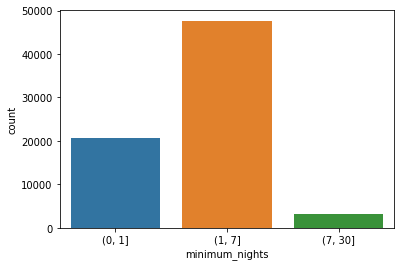

In [102]:
bins = [0,1,7,30]
nights = pd.cut(clean_data['minimum_nights'],bins)
sns.countplot(x=nights)
plt.show()

In [103]:
states = {'Asheville':'NC','Austin':'TX','Boston':'MA','Broward County':'FL','Cambridge':'MA','Chicago':'IL','Clark County':'NV','Columbus':'OH','Denver':'CO','Hawaii':'HI','Jersey City':'NJ',
             'Los Angeles':'SC','Nashville':'TN','New Orleans':'MS','New York City':'NY','Oakland':'CA','Pacific Grove':'CA','Portland':'OR','Rhode Island':'RI','Salem':'MA','San Clara Country':'CA',
             'Santa Cruz County':'CA','San Diego':'CA','San Francisco':'CA','San Mateo County':'CA','Seattle':'WA','Twin Cities MSA':'MN','Washington D.C.':'DC'}

In [104]:
clean_data['state'] = clean_data['city'].apply(lambda x : states[x])
numbers_state = clean_data['state'].value_counts()

In [105]:
fig = px.choropleth(locations=numbers_state.index, color=numbers_state.values,
                   locationmode="USA-states",scope="usa")

fig.update_layout(height=600, width=600,title="Number of Airbnb")
fig.show()

In [106]:
avg_p_state = clean_data.groupby('state').mean()
avg_p_state.head(3)

id       host_id   latitude   longitude       price  \
state                                                                  
CA     2.348563e+07  7.728105e+07  35.631663 -120.191149  127.273954   
CO     2.654435e+07  9.559704e+07  39.742141 -104.980288  121.032347   
DC     2.344625e+07  6.889961e+07  38.912641  -77.019326  120.123525   

       minimum_nights  number_of_reviews  reviews_per_month  \
state                                                         
CA           2.993440          40.665989           1.435671   
CO           2.850654          40.593944           1.754391   
DC           2.843289          39.790192           1.313798   

       calculated_host_listings_count  availability_365  
state                                                    
CA                           6.079645        130.606394  
CO                           6.761872         94.491397  
DC                           4.921460        124.339602

In [107]:
fig = px.choropleth(avg_p_state, locations=avg_p_state.index, color='price',
                   locationmode="USA-states",scope="usa")

fig.update_layout(height=400, width=600,title="Average Price of Airbnb")
fig.show()

In [108]:
import matplotlib.pyplot as plt
seattle = data[data['city']=='Seattle']
nyc = data[data['city']=='New York City']
feq=seattle['neighbourhood'].value_counts().sort_values(ascending=True)
feq

Industrial District            3
Holly Park                     4
South Park                     8
Roxhill                       11
View Ridge                    12
                            ... 
University District          238
Central Business District    240
Wallingford                  244
Belltown                     345
Broadway                     383
Name: neighbourhood, Length: 88, dtype: int64

In [109]:
feq_bar = px.bar(feq, orientation='h', title="Number of listings by neighbourhood", height=650)
feq_bar.show()

In [62]:
lats2018 = seattle['latitude'].tolist()
lons2018 = seattle['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

locations[0]

(47.61082, -122.29082)

In [63]:
import folium
from folium.plugins import FastMarkerCluster

In [64]:
map1 = folium.Map(location=[47.61, -122.29], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [31]:
data[data.city=='Asheville'].groupby('neighbourhood').count()

Empty DataFrame
Columns: [id, name, host_id, host_name, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, city]
Index: []

In [32]:
latsnyc = nyc['latitude'].tolist()
lonsnyc = nyc['longitude'].tolist()
locations = list(zip(latsnyc, lonsnyc))
locations[0]

(40.75362, -73.98377)

In [33]:
map2 = folium.Map(location=[40.75, -73.98], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map2)
map2

In [34]:
# Analyse the dist of words in name
name_words = []
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
english_stopwords.append('')

In [35]:
import re
def cleaning_name(row):
    st = str(row).lower()
    st = re.sub('apt','apartment',st)
    st = re.sub('w/','with',st)
    st = re.sub('br','bedroom',st)
    st = re.sub('bedrms','bedroom',st)
    st = re.sub('[+-\/|]',' ',st)
    return st

In [36]:
data['cleaned_name'] = data['name'].apply(cleaning_name)

In [37]:
for names in data['cleaned_name'].values:
    name_words.extend(names.split(' '))

name_words = [w for w in name_words if w not in english_stopwords]
print("Number of words:{}, unique words:{}".format(len(name_words), len(set(name_words))))

Number of words:476408, unique words:27012


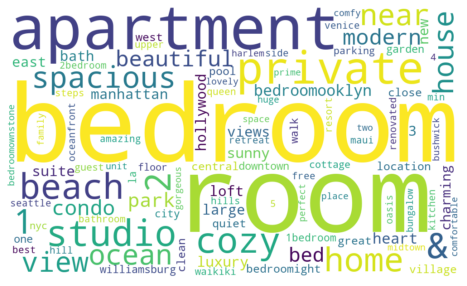

In [38]:
from wordcloud import WordCloud
from collections import Counter
name_common = {i[0]:i[1] for i in Counter(name_words).most_common(100)}
plt.figure(figsize=(10,5))
cloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(name_common)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()